<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/Dashboards/Hello_World_Dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mi primer Dashboard con Dash

*Elaborado por Camilo Pelaez cpelaezg@unal.edu.co y Andrés Marino Álvarez amalvarezme@unal.edu.co.*

Este Notebook se hizo con la intención de dar una guía clara y rápida para comprender la estructura, implementacion y posibilidades básicas de la librería Dash en la creación de Dashboards para la presentación de proyectos relacionados con analítica de datos. 

### Links usados para el tutorial

https://dash.plotly.com/layout

https://pbpython.com/plotly-dash-intro.html

https://realpython.com/python-dash/#what-is-dash

https://www.datacamp.com/community/tutorials/learn-build-dash-python

https://www.youtube.com/watch?v=FxEY1NOyhYQ

# Dash

- [Dash](
https://dash.plotly.com/layout) es un framework de código abierto para crear interfaces de visualización de datos. 

- Formalmente Dash fue lanzado como una biblioteca de código abierto para crear visualizaciones interactivas basadas en la Web y se construyó sobre Flask, Plotly.js y React Js,  este ha crecido para incluir implementaciones para R y Julia.

- Dash permite crear paneles utilizando Python puro. Tener conocimientos de HTML y javascript es útil, pero ciertamente no es necesario para obtener una buena visualización, solo necesita escribir Python, R o Julia.

## Instalar Dash en Colaboratory

La linea `pip install jupyter-dash -q` permite instalar la versión de Dash propia del compilador jupyter en Colab.

In [1]:
!pip install jupyter-dash -q 

     |████████████████████████████████| 7.3 MB 10.3 MB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 357 kB 64.3 MB/s 


## Componentes de HTML

- Para hablar de la creación de visualisaciones en Dash hay que hablar de HTML, donde necesitaremos un layout (diseño), que contenga los bloques (textos y gráficas) que queremos incluir mediente el uso de etiquetas. Algo similar a la manipulación de contenido sobre latex.

- Sin embargo, en lugar de escribir HTML o usar un motor de plantillas HTML, se emplearán estructuras de Python con la biblioteca dash-html-components.

- En el siguiente link se encuentran ejemplos ilustrativos relacionados con las diferencias principales en la construcción de dashboards usando html vs dash: [https://dash.plotly.com/dash-html-components](https://dash.plotly.com/dash-html-components)

- El comando html.Div permite crear secciones independientes dentro del layout. Por otra parte, html.H1 se usa para los títulos, el cuál tiene variaciones como H2, H3, ..., H6 para hacer subtítulos.

- El siguiente componente es html.P, utilizado para escribir párrafos. 

- La propiedad children. Por convención, siempre es el primer atributo, lo que significa que puede omitirlo: html.H1 (children = 'Hello Dash') es lo mismo que html.H1 ('Hello Dash'). Este puede contener una cadena, un número, un solo componente o una lista de componentes.

- Además, se usan html.Br() para el salto de página y html.A para incluir enlaces.

- Por último, se hablará de la propiedad style, la cual se agrega mediante un diccionario.

### Ejmplo de construccion html con dash

In [13]:
import dash_html_components as html #importar componentes html en dash

html.Div([                                                                       # Crear sección que contiene todo el texto
    html.H1('Hello world of Dash'),                                              # Título 'Hello world of Dash'
    html.Div([                                                                   # Crear sección para contener los párrafos
        html.P('Dash convierte las clases de Python en HTML'),                   # Párrafo forma Básica
        html.P(children=["Esta conversión se realiza entre bastidores mediante el front-end JavaScript de Dash", # Párrafo con links y cambio de estilo.
                        html.Br(),                                               # Salto de línea
                        html.A("https://dash.plotly.com/dash-html-components",   # Parte visible del link
                            href="https://dash.plotly.com/dash-html-components",), # Dirección a la cual a punta el link
                    ],
                    style={"textAlign": "center", "color": "#000000"},           # Diccionario para definición de estilo
                ),

    ])
])

Div([H1('Hello world of Dash'), Div([P('Dash convierte las clases de Python en HTML'), P(children=['Esta conversión se realiza entre bastidores mediante el front-end JavaScript de Dash', Br(None), A(children='https://dash.plotly.com/dash-html-components', href='https://dash.plotly.com/dash-html-components')], style={'textAlign': 'center', 'color': '#000000'})])])

### Dash y Markdown

Soportes Dash [Markdown](http://commonmark.org/help).

- Markdown es una forma sencilla de escribir y formatear texto.

- Incluye sintaxis para **negrita** y *cursiva*,
[links](http://commonmark.org/help), fragmentos de `código` en línea, listas,
citas y mucho más.

In [14]:
import dash_core_components as dcc #importar componentes dash

dcc.Markdown('''
#### Dash and Markdown

Soportes Dash [Markdown](http://commonmark.org/help).

Markdown es una forma sencilla de escribir y formatear texto.
Incluye sintaxis para **negrita** y *cursiva*,
[links](http://commonmark.org/help), fragmentos de `código` en línea, listas,
citas y mucho más.
''')

Markdown('\n#### Dash and Markdown\n\nSoportes Dash [Markdown](http://commonmark.org/help).\n\nMarkdown es una forma sencilla de escribir y formatear texto.\nIncluye sintaxis para **negrita** y *cursiva*,\n[links](http://commonmark.org/help), fragmentos de `código` en línea, listas,\ncitas y mucho más.\n')

## Gráficas

- Los gráficos serán el componentes de principal interés ya que un dashboard es una herramienta de gestión de la información que muestra de manera visual los indicadores clave de desempeño.

- Asi que nesesitaremos formas vistosas y eficientes para mostrar los resultados.

- Dash ofrece diferentes librerías para gráficos,
además de los callbacks para gráficas interactivas.

### En el siguiente link se encuentran ejemplos de las gráficas

https://dash.plotly.com/dash-core-components/graph

### Ejemplos de gráficos (chartjs) de HTML

https://www.chartjs.org/docs/latest/charts/

https://developers.google.com/chart/interactive/docs/gallery/areachart

### Ejemplos de funciones usadas para graficar en Dash

En las siguientes celdas veremos la forma tradicional de mostrar gráficos en python, en las siguientes dos veremos cómo hacer esto mismo con las librerías más usadas en Dash: [Graph Objects](https://plotly.com/python/graph-objects/) y [Express](https://plotly.com/python/plotly-express/).

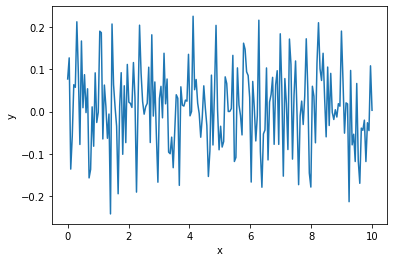

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 200 # número de puntos
x = np.linspace(0,10,N) # vector tiempo 

mu, sigma = 0, 0.1 # media y desviacion estandar
y = np.random.normal(mu, sigma,N) # vector aleatorio de distribucion normal

plt.plot(x,y) # Grafica tiempo(x) vs vector aleatorio(y) hecha con matplotlib.pyplot
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
# Express
import plotly.express as px # importar libreria graficas express

fig = px.line(x=x, y=y) # Grafica tiempo(x) vs vector aleatorio(y) hecha con plotly.express
fig.show() # Mostrar grafica

In [20]:
# Graph Objects
import plotly.graph_objects as go  # importar libreria graficas Graph Objects

fig = go.Figure() # Definir grafica tipo plotly.graph_objects
fig.add_trace(go.Line(x=x, y=y))# Añadir trasa tiempo(x) vs vector aleatorio(y) hecha con plotly.graph_objects
fig.update_layout(title="Plot Title",xaxis_title="x", yaxis_title="y",
                  font=dict(
                      family="Courier New, monospace",
                      size=18,
                    color="#7f7f7f"))
fig.show() # Mostrar grafica

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# ¿Ventajas de las los paquetes graph_objects y express?

- Estos paquetes muestran su verdadera utilidad al tratar con Datasets.

- A contunuación veremos un ejemplo de trabajo con estos paquetes donde desde una Dataset se mostrará un gráfico de barras agrupado por marca y separado por vendedor, permitiendo observar rápida y facilmente la información.

- Además, estos paquetes permiten hacer gráficas interactivas mediante Callbakcs.

In [21]:
import pandas as pd # Importar libreria pandas 

df = pd.DataFrame({   # Dataset para mostrar el uso de las graficas
  "Cell phone brand": ["Apple", "Xiaomi", "Samsung", "Apple", "Xiaomi", "Samsung"],
  "Sellers": ["SellerA", "SellerA", "SellerA", "SellerB", "SellerB", "SellerB"],
  "Number sales": [1, 2, 3, 3, 1, 2],
})


# Express
fig = px.bar(df, x="Cell phone brand", y="Number sales", color="Sellers", barmode="group")
fig.show()


# Graph Objects
fig = go.Figure() # Definir grafica tipo plotly.graph_objects
for Sellers, group in df.groupby("Sellers"): # Ciclo para Añadir las trasas de los Sellers
    fig.add_trace(go.Bar(x=group["Cell phone brand"], y=group["Number sales"], name=Sellers,
      hovertemplate="Sellers=%s<br>Cell phone brand=%%{x}<br>Number sales=%%{y}<extra></extra>"% Sellers)) # Añadir la trasa
fig.update_layout(legend_title_text = "Sellers") # legenda 
fig.update_xaxes(title_text="Cell phone brand") # Nombre eje x
fig.update_yaxes(title_text="Number sales") # Nombre eje y 
fig.show()

# Graficas interactivas

- Este tipo de gráficos permiten enlazar alguna interfaz con la gráfica que se desea hacer interactiva, mediante el [decorador](https://www.geeksforgeeks.org/decorators-in-python/) `@app.callback`.

- Algunos links relacionados se presentan a continuación:

https://dash.plotly.com/basic-callbacks

https://plotly.com/python/statistical-charts/

https://dash.plotly.com/interactive-graphing

# Instalar componetes para ver el Dash de forma remota en Colab



- La linea `pip install pyngrok` permite intalar una api de ngrok en Python. 

- ngrok es una herramienta de proxy inverso que abre túneles seguros desde URL públicas a localhost, perfecta para exponer servidores web locales, habilitar el acceso SSH, probar chatbots, hacer demostraciones desde su propia máquina y más.

- Además, permite una integración nativa de Python a través de [pyngrok](https://pypi.org/project/pyngrok/).

In [22]:
!pip install pyngrok

# Configurar Nkrok

Se descarga una versión estable de ngrok para el sistema linux usado en Colab.

In [23]:
#download ngrok first
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -q
!unzip -q ngrok-stable-linux-amd64.zip

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


- Creación del tunel `http` al local host.


In [24]:
import requests
get_ipython().system_raw("./ngrok http 8050 &")
# check public url
import time

time.sleep(3)
r = requests.get("http://localhost:4040/api/tunnels")
url = r.json()["tunnels"][0]["public_url"]
url

'https://9fc1-35-230-122-29.ngrok.io'

# Mostrar en Dash

- Para la creación de este Dashboard se usaron los elemtos mencionados anteriormente, adicionando en las secciones html el comando Children, el html.br y style.

- Además, se incluyen algunos ejemplos de gráficas interactivas.

In [25]:
from jupyter_dash import JupyterDash  # pip install dash
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import plotly.express as px
import plotly.graph_objects as go
from dash import no_update
import pandas as pd  # 

external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

df = px.data.iris()  # Base de datos iris obtenida desde plotly.espress

app = JupyterDash(
    __name__, external_stylesheets=external_stylesheets
)  # Crear objeto JupyterDash para visualización en el entorno
# Crear un layout para contener el texto y gráficas.
# Crea Div para separar secciones, no tiene ningún efecto sobre el contenido o el diseño hasta que se le aplica estilo usando CSS.
app.layout = html.Div(
    children=[
        html.H1(
            children="Hello Word of Dash",
            style={
                "textAlign": "center",
                "color": "#0D6080",
            },  # La función style nos permite personalizar la estética del documento
        ),  # Creación del título(Encabezado)
        html.P(
            children=[
                """
                            Algún texto del párrafo....

                """
            ],
            style={"textAlign": "center", "color": "#004D38"},
        ),  # Creacion Parrafo
        dcc.Markdown(
            children=[
                            """
                             Este dashboard presenta las gráficas básicas en Dash sobre la base de datos iris
                            """
            ],
            style={"textAlign": "center", "color": "#000000"},
        ),  # Implementación de texto con Markdown
        html.Div(
            [
                html.H2(
                    children="Gráficas con funciones (plotly.graph_objects)",  # Crear subtitulo(los encabezados reduciran su tamaño al aumentar el numero al lado del H)
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La función style nos permite personalizar la estética del documento
                ),  # Creación del título (Encabezado)
                html.P(
                    children=[
                        "Ejemplos de Gráficas:.",
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/graph-objects/",
                            href="https://plotly.com/python/graph-objects/",
                        ),
                    ],
                    style={"textAlign": "center", "color": "#000000"},
                ),  # Creación Párrafo
                dcc.Graph(  # Sección Grafica
                    id="example-graph",  # id Gráfica
                    figure=go.Figure(data=[  # Gráfica barras tipo Go
                          go.Bar(x=df.index, y=df.sepal_width, name='sepal_width'), 
                          go.Bar(x=df.index, y=df.sepal_length, name='sepal_length')], 
                          layout=go.Layout(title="Bar diagram with go")),
                ),
                dcc.Graph(  # Sección Gráfica
                    id="example-graph-boxplot",  # id Gráfica
                    figure=go.Figure(data=[  # Gráfica barras tipo Go
                          go.Box(y=df.sepal_width, name='sepal_width'), 
                          go.Box(y=df.sepal_length, name='sepal_length')], 
                          layout=go.Layout(title="Boxplot with go")),
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-histogram",  # id Grafica
                    figure=go.Figure(data=[  # Grafica barras tipo Go
                          go.Histogram(x=df.sepal_width)], 
                          layout=go.Layout(title="Histogram with go")),
                ),
                html.H2(
                    children="Graficas con funciones(plotly.express)",
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La función style nos permite personalizar la estetica del documento
                ),  # Creción del título(Encabezado)
                html.P(
                    children=[
                        "Ejemplos Graficas:.",
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/plotly-express/",
                            href="https://plotly.com/python/plotly-express/",
                        ),
                    ],
                    style={"textAlign": "center", "color": "#000000"},
                ),  # Creacion Parrafo
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.bar(
                        df,
                        x=df.index,
                        y="sepal_width",
                        color=df.species,
                        title="Bar diagram with px",
                    ),  # Grafica Barras con Funciones
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-boxplot-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.box(
                        df, y="sepal_width", color=df.species, title="Boxplot with px"
                    ),  # Boxplot con Funciones
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-histogram-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.histogram(
                        df, x="sepal_length", y="sepal_width", title="Histogram with px"
                    ),  # Histograma con Funciones
                ),
            ],
            style={"columnCount": 2},
        ),  # Estilo 2 columnas
        html.Div(
            [
                html.H2(
                    children="Graficas más elaboradas",
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La funcion style nos permite personalizar la estetica del documento
                ),  # Crecion del titulo(Encabezado)
                html.P(
                    children=[
                        "La ventaja de usar funciones es que se pueden crear graficas mas complejas con poco codigo como las siguientes",
                        html.Br(),
                        "en las cuales vemos gran cantidad de datos y estas permiten una implemtacion facil y rapida de los Callback.",
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/",
                            href="https://plotly.com/python/",
                        ),
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/statistical-charts/",
                            href="https://plotly.com/python/statistical-charts/",
                        ),
                        html.Br(),
                        html.A(
                            "https://plotly.com/python/ai-ml/",
                            href="https://plotly.com/python/ai-ml/",
                        ),
                    ],
                    style={"textAlign": "center", "color": "#000000"},
                ),  # Creacion Parrafo
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-multyscatter-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.scatter_matrix(
                        df,
                        dimensions=[
                            "sepal_width",
                            "sepal_length",
                            "petal_width",
                            "petal_length",
                        ],
                        color="species",
                        title="scatteplot with px",
                    ),  # Grafica matriz scater plot
                ),
                dcc.Graph(  # Seccion Grafica
                    id="example-graph-histmarginal-px",  # id Grafica
                    config={
                        "displayModeBar": False
                    },  # Opciones de configuración de Plotly.js.(config es un dictado con claves)
                    # displayModeBar muestra la barra de modo (True, False o 'hover').
                    animate=True,  # Activa Funcion animada de ploty
                    figure=px.histogram(
                        df,
                        x="sepal_length",
                        y="sepal_width",
                        color="species",
                        marginal="box",
                        title="Scatterplot with marginal graf x, y in px",
                    ),  # Historagama con grafica marginal boxplot
                ),
                html.H3(
                    children="Graficas interactivas(Callback)",
                    style={
                        "textAlign": "center",
                        "color": "#0D6080",
                    },  # La funcion style nos permite personalizar la estetica del documento
                ),  # Crecion del titulo(Encabezado)
                dcc.Dropdown(
                    id="dropdown",  # id Multi-Select Dropdown
                    options=[{"label": x, "value": x} for x in ["sepal_width", "sepal_length", "petal_width", "petal_length"]],
                    value=["sepal_width", "sepal_length"],
                    multi=True,
                ),
                dcc.Graph(id="splom"),  # id Grafica
                dcc.Graph(id="graph"),  # id Grafica
                html.P("Select Distribution:"),
                dcc.RadioItems(
                    id="dist-marginal",  # id Checkboxes
                    options=[
                        {"label": x, "value": x} for x in ["box", "rug", "violin"]
                    ],
                    value="box",
                ),
            ],
            style={"columnCount": 2},
        ),  # Estilo 2 columnas
    ]
)

@app.callback(Output("splom", "figure"), [Input("dropdown", "value")])  # id Grafica
def update_bar_chart(dims):
    fig = px.scatter_matrix(df, dimensions=dims, color="species")
    return fig

@app.callback(
    Output("graph", "figure"), [Input("dist-marginal", "value")]  # id Grafica
)
def display_graph(marginal):
    fig = px.histogram(
        df,
        x="sepal_length",
        y="sepal_width",
        color="species",
        marginal=marginal,
        hover_data=df.columns,
    )
    return fig

app.run_server(mode="inline", port=8050)

# 636EFB violeta graf 
# EF553B naranja graf
# 00CD95 verde graf
# 004D38 Verde cool


<IPython.core.display.Javascript object>

In [26]:
df.head() #df esta en formato dataframe de pandas

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


## Para ver como página web se accede al link creado por requests y ngrok

**Nota**: Algunos navegadores bloquearán el acceso por seguridad, debe habilitar la pestaña detalles para acceder.

In [27]:
url

'https://9fc1-35-230-122-29.ngrok.io'